In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from sklearn.neural_network import MLPRegressor


In [101]:
# Load the CSV file
file_path = 'Fish.csv'
fish_data = pd.read_csv(file_path)
fish_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [102]:
print(fish_data.describe())

            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


In [103]:
# Summary statistics for categorical columns
print(fish_data.describe(include=['object']))

       Species
count      159
unique       7
top      Perch
freq        56


In [104]:
# Check for missing values
print(fish_data.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [105]:
# Drop rows with any missing values
fish_data_cleaned = fish_data.dropna()

# Display basic information after dropping missing values
print(fish_data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None


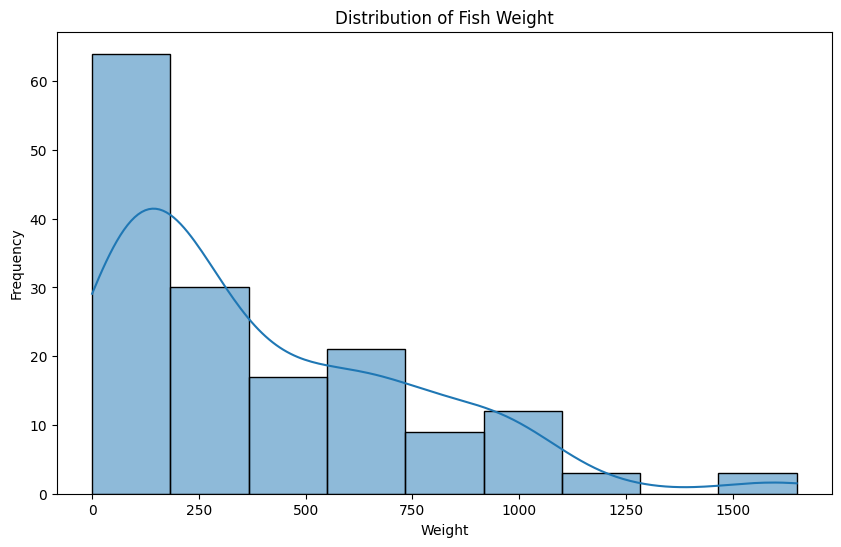

In [106]:
# Distribution plot of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(fish_data_cleaned['Weight'], kde=True)
plt.title('Distribution of Fish Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [107]:
# Encoding categorical features for correlation heatmap
encoded_fish_data = fish_data_cleaned.copy()
for col in encoded_fish_data.select_dtypes(include=['object']).columns:
    encoded_fish_data[col] = encoded_fish_data[col].astype('category').cat.codes

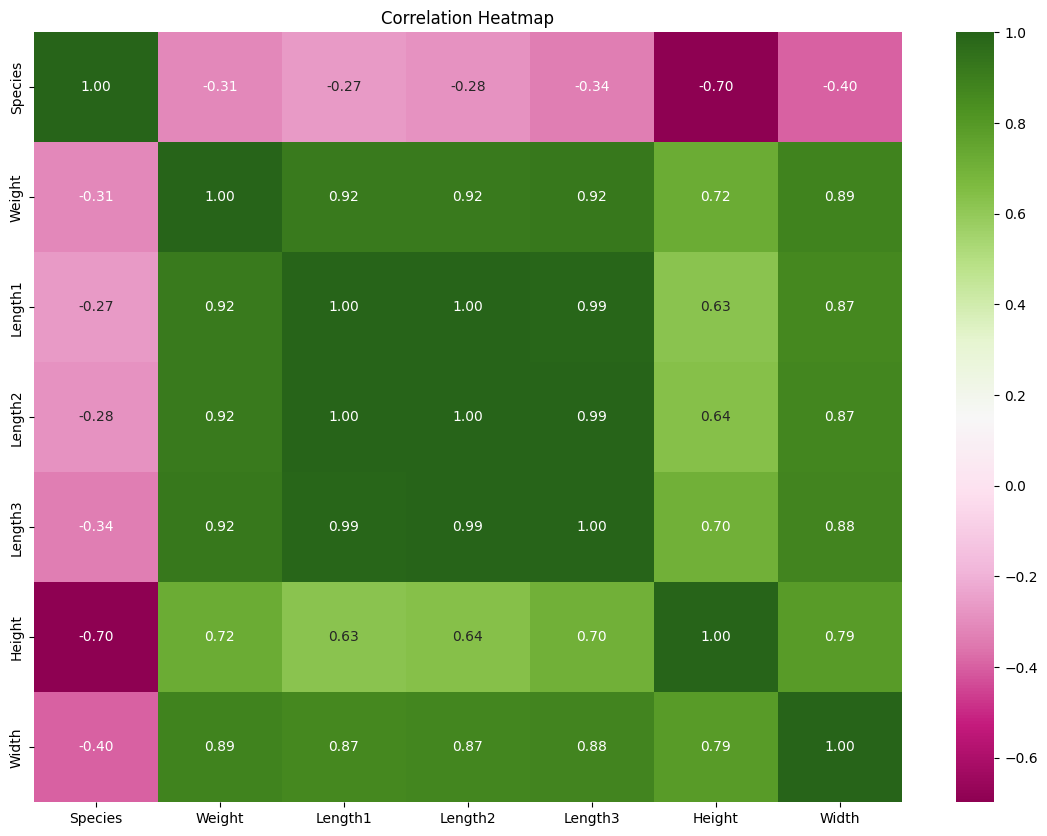

In [108]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(encoded_fish_data.corr(), annot=True, cmap='PiYG', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [109]:
# Define the feature set (X) and the target variable (y)
X = fish_data_cleaned.drop(columns=['Length2', 'Length3', 'Weight'])
y = fish_data_cleaned['Weight']

In [110]:
# Split data into training (60%), validation (20%), and test (20%) sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Training set: (95, 4), Validation set: (32, 4), Test set: (32, 4)


In [111]:
# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

In [112]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Define preprocessing for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [114]:
# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [115]:
# Preprocessing for numerical data: scaling
numerical_transformer = StandardScaler()

In [116]:
# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [117]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [118]:
# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2, predictions

# Define models to test
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(random_state=42)
}

final_results = {}
predictions_dict = {}

In [119]:
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    
    # Evaluate on validation set
    val_mse, val_r2, _ = evaluate_model(pipeline, X_val, y_val)
    print(f"Validation MSE: {val_mse:.2f}, Validation R²: {val_r2:.2f}")

    # Evaluate on test set
    test_mse, test_r2, predictions = evaluate_model(pipeline, X_test, y_test)
    final_results[model_name] = {'Validation MSE': val_mse, 'Validation R²': val_r2,
                                 'Test MSE': test_mse, 'Test R²': test_r2}
    predictions_dict[model_name] = predictions

# Display final results
results_df = pd.DataFrame(final_results).T
print("\nFinal Model Evaluation:")
print(results_df)


Training Linear Regression...
Validation MSE: 4867.91, Validation R²: 0.93

Training Ridge Regression...
Validation MSE: 3983.74, Validation R²: 0.94

Training Lasso Regression...
Validation MSE: 4714.26, Validation R²: 0.93

Training Random Forest...
Validation MSE: 4964.61, Validation R²: 0.93

Final Model Evaluation:
                   Validation MSE  Validation R²     Test MSE   Test R²
Linear Regression     4867.911238       0.928901  8910.862401  0.937353
Ridge Regression      3983.744353       0.941815  7578.348476  0.946721
Lasso Regression      4714.262167       0.931145  8481.425354  0.940372
Random Forest         4964.607975       0.927489  4604.741771  0.967627


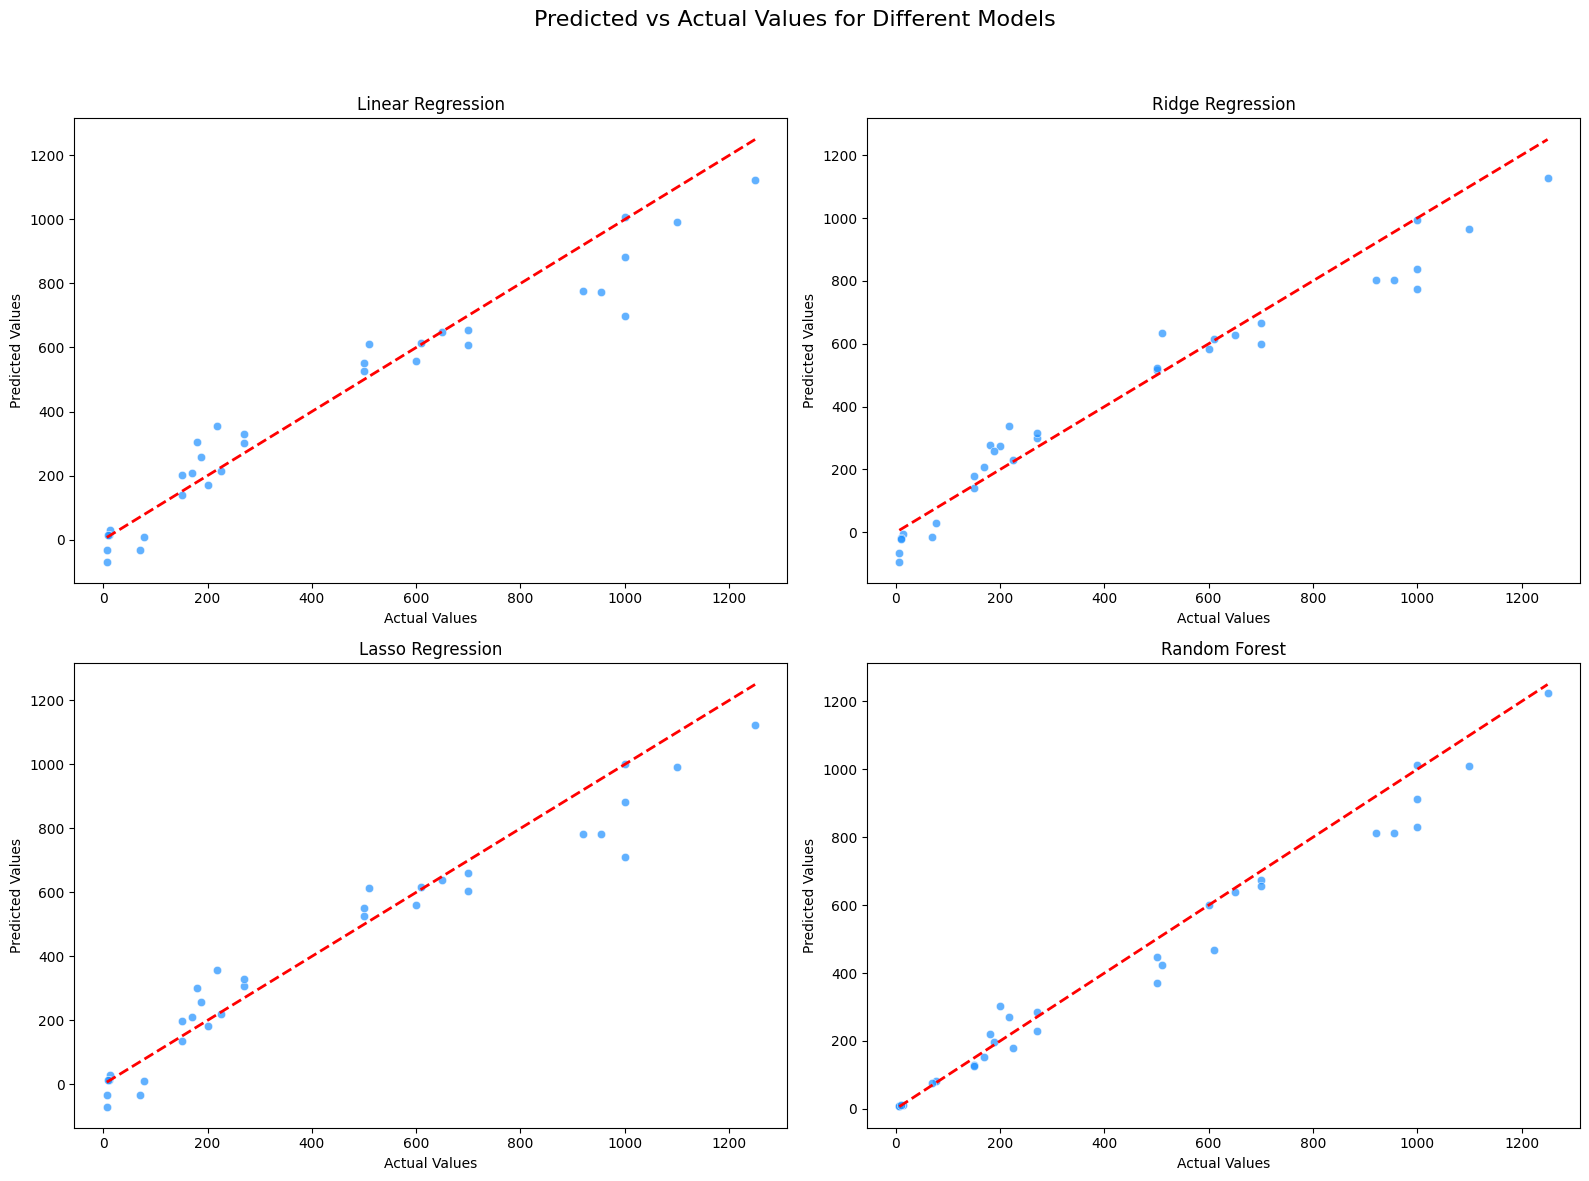

In [120]:
# Visualization: Predicted vs Actual
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
fig.suptitle('Predicted vs Actual Values for Different Models', fontsize=16)

for i, (model_name, predictions) in enumerate(predictions_dict.items()):
    sns.scatterplot(x=y_test, y=predictions, ax=axes[i], color='dodgerblue', alpha=0.7)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    axes[i].set_title(model_name)
    axes[i].set_xlabel('Actual Values')
    axes[i].set_ylabel('Predicted Values')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [121]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Species' is the categorical column with string values like 'Perch', 'Salmon', etc.
# Encode the categorical 'Species' column
label_encoder = LabelEncoder()
fish_data_cleaned['Species'] = label_encoder.fit_transform(fish_data_cleaned['Species'])

# Now split the data again
X = fish_data_cleaned.drop(columns=['Length2', 'Length3', 'Weight'])
y = fish_data_cleaned['Weight']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model and continue as before


In [122]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)  # Neural network model
}


In [123]:
# Function to evaluate the models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2, predictions

In [124]:
# Create a dictionary to store the results
results = {}
predictions_dict = {}

In [125]:
# Training loop to use validation set
results = {}
predictions_dict = {}

for model_name, model in models.items():
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Train the model on the training set
    pipeline.fit(X_train, y_train)
    
    # Evaluate on the validation set
    val_mse, val_r2, val_predictions = evaluate_model(pipeline, X_val, y_val)
    
    # Store validation results
    results[model_name] = {'Validation MSE': val_mse, 'Validation R²': val_r2}
    predictions_dict[model_name] = val_predictions

# Display the validation results
print("Validation Results:")
for model_name, result in results.items():
    print(f"{model_name} - Validation MSE: {result['Validation MSE']:.2f}, Validation R²: {result['Validation R²']:.2f}")



Validation Results:
Linear Regression - Validation MSE: 18549.62, Validation R²: 0.73
Ridge Regression - Validation MSE: 10996.19, Validation R²: 0.84
Lasso Regression - Validation MSE: 17501.70, Validation R²: 0.74
Neural Network - Validation MSE: 71375.54, Validation R²: -0.04


C:\Users\71548\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


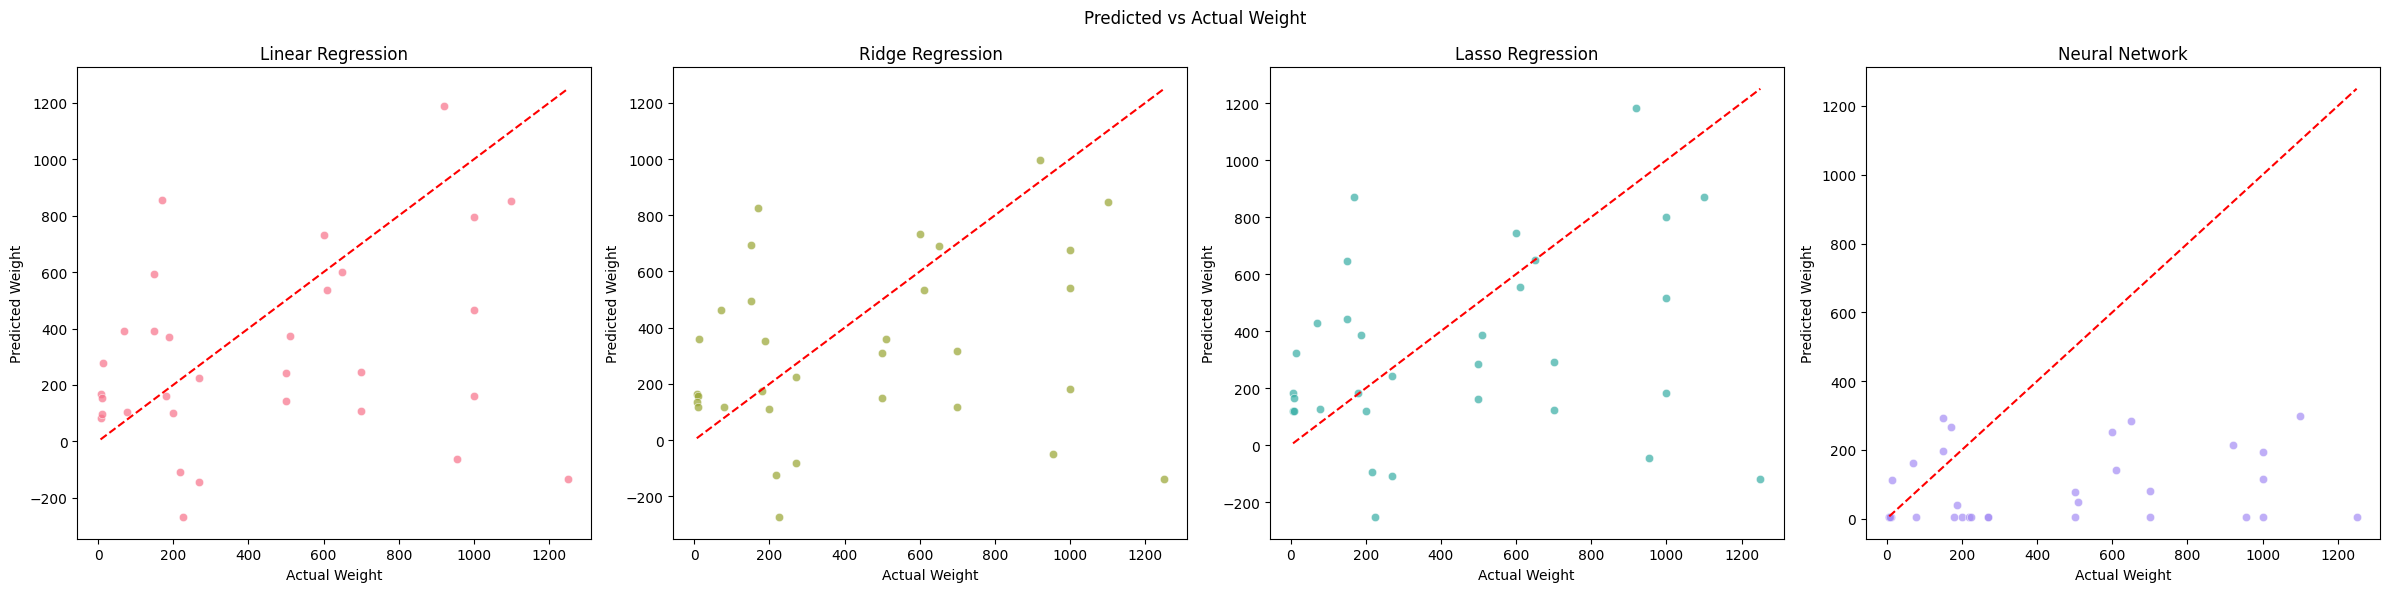

In [126]:
# Visualization: Distribution of predicted vs actual weight
fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # Adjusting the number of axes to 4 for all models
fig.suptitle('Predicted vs Actual Weight')

palette = sns.color_palette("husl", 4)  # 4 colors for 4 models

for i, (model_name, predictions) in enumerate(predictions_dict.items()):
    sns.scatterplot(x=y_test, y=predictions, ax=axes[i], alpha=0.7, color=palette[i])
    axes[i].set_title(model_name)
    axes[i].set_xlabel('Actual Weight')
    axes[i].set_ylabel('Predicted Weight')
    axes[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [127]:
X_train.shape

(127, 4)

In [128]:
# Step 1: Define the neural network model for regression
nn_model = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),  # Adjust input shape based on number of features
    
    # Hidden layers with ReLU activation
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    
    # Output layer with 1 neuron (for predicting weight) and no activation function
    Dense(1)  # No activation function for regression
])

C:\Users\71548\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [129]:
# Step 2: Compile the neural network model
nn_model.compile(optimizer='adam',
                 loss='mean_squared_error',  # Use MSE for regression
                 metrics=['mae'])  # Mean Absolute Error for evaluation

In [130]:
# Step 3: Train the neural network model
history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=32)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - loss: 279671.3125 - mae: 402.7101 - val_loss: 152389.6875 - val_mae: 290.7786
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 270501.6875 - mae: 381.6358 - val_loss: 150758.8438 - val_mae: 288.5125
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 308739.8750 - mae: 406.8727 - val_loss: 149113.3281 - val_mae: 286.2103
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 286918.3750 - mae: 398.9493 - val_loss: 147484.2969 - val_mae: 283.9155
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 271256.9375 - mae: 380.3106 - val_loss: 145870.3125 - val_mae: 281.6262
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 282952.2188 - mae: 389.9717 - val_loss: 144209.4688 - val_mae: 279.2551
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 295283.8125 - mae: 402.4485 - val_loss: 142505.7969 - val_mae: 276.9391
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 262797.8125 - mae: 369.5366 - v

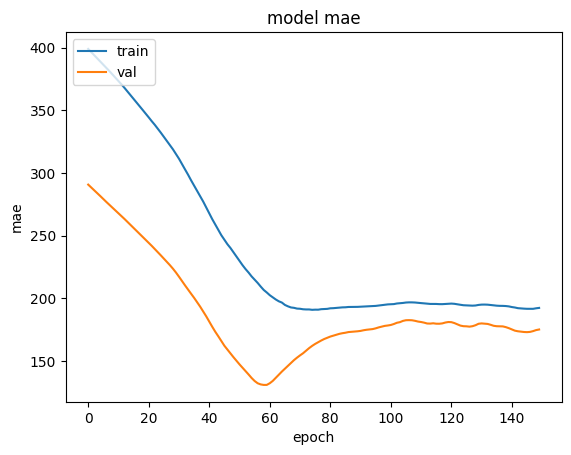

In [131]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

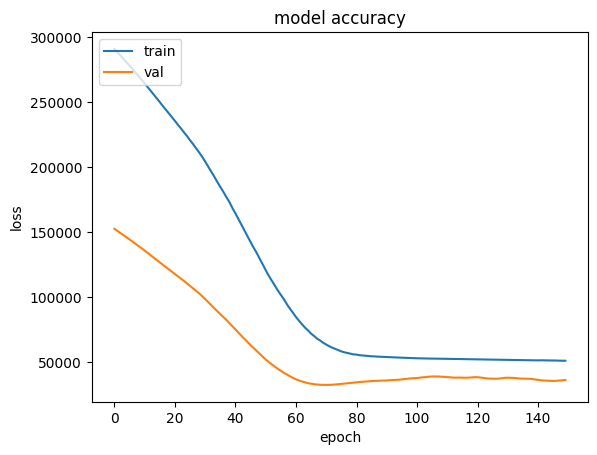

In [132]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [133]:
# Step 4: Evaluate the neural network model
nn_mse, nn_mae = nn_model.evaluate(X_test, y_test)
print(f"Neural Network - MSE: {nn_mse:.2f}, MAE: {nn_mae:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 46920.2617 - mae: 191.8810
Neural Network - MSE: 46920.26, MAE: 191.88


In [134]:
from sklearn.metrics import r2_score

# Step 1: Predict using the trained neural network model
y_pred = nn_model.predict(X_test)

# Step 2: Calculate R² using the sklearn function or manually
r2 = r2_score(y_test, y_pred)

# Step 3: Print the results
print(f"Neural Network - MSE: {nn_mse:.2f}, MAE: {nn_mae:.2f}, R²: {r2:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Neural Network - MSE: 46920.26, MAE: 191.88, R²: 0.67
